In [1]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf  # For tf.data
import matplotlib.pyplot as plt
import keras
from tensorflow import keras
from keras import layers
from keras.applications import EfficientNetB0
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
import seaborn as sns
import pickle
from tensorflow.keras.models import load_model


2024-08-29 13:12:20.000066: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-29 13:12:20.000187: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-29 13:12:20.148401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
from tensorflow.keras.models import load_model

# Load the model saved in Keras HDF5 format
model = load_model("/kaggle/input/split_8_2_model/tensorflow2/default/1/SPILT_8_2_mnv2_cifar9_160_fbn_4.keras")

import os, sys, wget
from zipfile import ZipFile

url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
tiny_imgdataset = wget.download(url, out=os.getcwd())

# Extract the downloaded zip file
zip_file = os.path.join(os.getcwd(), "tiny-imagenet-200.zip")

if os.path.exists(zip_file):
    with ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(os.getcwd())
    print("Extraction completed.")
else:
    print("Zip file not found.")


' \nfrom tensorflow.keras.models import load_model\n\n# Load the model saved in Keras HDF5 format\nmodel = load_model("/kaggle/input/split_8_2_model/tensorflow2/default/1/SPILT_8_2_mnv2_cifar9_160_fbn_4.keras")\n\nimport os, sys, wget\nfrom zipfile import ZipFile\n\nurl = \'http://cs231n.stanford.edu/tiny-imagenet-200.zip\'\ntiny_imgdataset = wget.download(url, out=os.getcwd())\n\n# Extract the downloaded zip file\nzip_file = os.path.join(os.getcwd(), "tiny-imagenet-200.zip")\n\nif os.path.exists(zip_file):\n    with ZipFile(zip_file, \'r\') as zip_ref:\n        zip_ref.extractall(os.getcwd())\n    print("Extraction completed.")\nelse:\n    print("Zip file not found.")\n'

### ΠΡΕΠΕΙ ΝΑ ΒΑΛΕΙΣ ΚΑΙ ΑΛΛΗ ΜΙΑ ΚΛΑΣΗ ΑΠΟ ΤΟ IAMENET

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import glob

# Set parameters
IMAGE_SHAPE = (160, 160, 3)
IMG_SIZE = 160
BATCH_SIZE = 128
BUFFER_SIZE = BATCH_SIZE * 10
AUTO = tf.data.AUTOTUNE

# Define preprocessing layers
preprocessing = keras.Sequential(
    [
        layers.Rescaling(1./255.0, offset=0),
        layers.Resizing(IMAGE_SHAPE[0], IMAGE_SHAPE[1], interpolation='bilinear')
    ],
    name="preprocessing",
)

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.15),
        layers.RandomContrast(factor=0.1),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
def load_images_from_folder(folder, label):
    image_files = glob.glob(os.path.join(folder, "*.JPEG"))
    print(f"Found {len(image_files)} images")
    images = []
    labels = []
    for img_file in image_files:
        img = tf.io.read_file(img_file)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [IMAGE_SHAPE[0], IMAGE_SHAPE[1]])  # Resize image
        images.append(img)
        labels.append(label)
    return images, labels


    
train_folder = "/kaggle/working/tiny-imagenet-200/train/n03706229/images" #magnetic compass- πυξίδα
train_folder_2 = "/kaggle/working/tiny-imagenet-200/train/n04456115/images" # δάδα
train_images, train_labels = load_images_from_folder(train_folder, 8)
train_images_2, train_labels_2 = load_images_from_folder(train_folder_2, 9)




' \nimport tensorflow as tf\nfrom tensorflow import keras\nfrom tensorflow.keras import layers\nimport os\nimport glob\n\n# Set parameters\nIMAGE_SHAPE = (160, 160, 3)\nIMG_SIZE = 160\nBATCH_SIZE = 128\nBUFFER_SIZE = BATCH_SIZE * 10\nAUTO = tf.data.AUTOTUNE\n\n# Define preprocessing layers\npreprocessing = keras.Sequential(\n    [\n        layers.Rescaling(1./255.0, offset=0),\n        layers.Resizing(IMAGE_SHAPE[0], IMAGE_SHAPE[1], interpolation=\'bilinear\')\n    ],\n    name="preprocessing",\n)\n\ndata_augmentation = keras.Sequential(\n    [\n        layers.RandomFlip("horizontal"),\n        layers.RandomRotation(factor=0.15),\n        layers.RandomContrast(factor=0.1),\n        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),\n        layers.RandomZoom(height_factor=0.2, width_factor=0.2),\n    ],\n    name="data_augmentation",\n)\ndef load_images_from_folder(folder, label):\n    image_files = glob.glob(os.path.join(folder, "*.JPEG"))\n    print(f"Found {len(image_fil

In [6]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# create n- and m-datasets
def create_datasets(x, y, n_classes):

    x_n = []
    y_n = []
    x_m = []
    y_m = []
    for x_, y_ in zip (x, y):
        if y_ in n_classes:
            x_n.append(x_)
            y_n.append(y_)
        else:
            x_m.append(x_)
            y_m.append(y_)
    return np.array(x_n), np.array(y_n), np.array(x_m), np.array(y_m)

n_classes = [0, 1, 2, 3, 4, 5, 6, 7]
x_train_n, y_train_n, x_train_m, y_train_m = create_datasets(x_train, y_train, n_classes)
x_test_n, y_test_n, x_test_m, y_test_m = create_datasets(x_test, y_test, n_classes)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

y_train_n = tf.keras.utils.to_categorical(y_train_n, num_classes=10)
y_test_n = tf.keras.utils.to_categorical(y_test_n, num_classes=10)

y_train_m = tf.keras.utils.to_categorical(y_train_m, num_classes=10)
y_test_m = tf.keras.utils.to_categorical(y_test_m, num_classes=10)

# preprocessing
IMAGE_SHAPE = (160, 160, 3)

preprocessing = keras.Sequential(
    [
        layers.Rescaling(1./255.0, offset=0),
        layers.Resizing(IMAGE_SHAPE[0], IMAGE_SHAPE[1], interpolation='bilinear')
    ],
    name="preprocessing",
)

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.15),
        layers.RandomContrast(factor=0.1),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
BATCH_SIZE = 128
BUFFER_SIZE = BATCH_SIZE * 10
AUTO = tf.data.AUTOTUNE
# original
ds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
ds_train = ds_train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).map(lambda x, y: (data_augmentation(preprocessing(x)), y)).prefetch(AUTO)

ds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
ds_test = ds_test.batch(BATCH_SIZE).map(lambda x, y: (preprocessing(x), y)).prefetch(AUTO)

# n-dataset
ds_train_n = tf.data.Dataset.from_tensor_slices((x_train_n, y_train_n))
ds_train_n = ds_train_n.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).map(lambda x, y: (data_augmentation(preprocessing(x)), y)).prefetch(AUTO)

ds_test_n = tf.data.Dataset.from_tensor_slices((x_test_n, y_test_n))
ds_test_n = ds_test_n.batch(BATCH_SIZE).map(lambda x, y: (preprocessing(x), y)).prefetch(AUTO)

# m-dataset
ds_train_m = tf.data.Dataset.from_tensor_slices((x_train_m, y_train_m))
ds_train_m = ds_train_m.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).map(lambda x, y: (data_augmentation(preprocessing(x)), y)).prefetch(AUTO)

ds_test_m = tf.data.Dataset.from_tensor_slices((x_test_m, y_test_m))
ds_test_m = ds_test_m.batch(BATCH_SIZE).map(lambda x, y: (preprocessing(x), y)).prefetch(AUTO)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [7]:
ds_train_m = ds_train_m.unbatch().batch(1)
ds_train_n = ds_train_n.unbatch().batch(1)
ds_test_n = ds_test_n.unbatch().batch(1)
ds_test_m = ds_test_m.unbatch().batch(1)

In [8]:
import numpy as np
import os
import absl.logging
from PIL import Image
import os
import zipfile 
def calculate_bvsb(probs):
    sorted_probs = np.sort(probs, axis=1)[:, ::-1]
    bvsb = sorted_probs[:, 0] - sorted_probs[:, 1]
    return bvsb

def save_images(images, output_dir, image_format='PNG'):
    os.makedirs(output_dir, exist_ok=True)
    
    for idx, image in enumerate(images):
        image = np.clip(image, 0.0, 1.0)
        image_uint8 = (image.squeeze() * 255.0).astype(np.uint8)
        if image_uint8.shape[0] == 3:
            image_uint8 = np.transpose(image_uint8, (1, 2, 0))
        image_pil = Image.fromarray(image_uint8)
        temp_image_path = os.path.join(output_dir, f'image_{idx}.{image_format.lower()}')
        image_pil.save(temp_image_path, format=image_format)

In [ ]:
BATCH_SIZE = 128
BUFFER_SIZE = BATCH_SIZE * 10
AUTO = tf.data.AUTOTUNE
# original
ds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
ds_train = ds_train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).map(lambda x, y: (data_augmentation(preprocessing(x)), y)).prefetch(AUTO)

ds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
ds_test = ds_test.batch(BATCH_SIZE).map(lambda x, y: (preprocessing(x), y)).prefetch(AUTO)

# n-dataset
ds_train_n = tf.data.Dataset.from_tensor_slices((x_train_n, y_train_n))
ds_train_n = ds_train_n.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).map(lambda x, y: (data_augmentation(preprocessing(x)), y)).prefetch(AUTO)

ds_test_n = tf.data.Dataset.from_tensor_slices((x_test_n, y_test_n))
ds_test_n = ds_test_n.batch(BATCH_SIZE).map(lambda x, y: (preprocessing(x), y)).prefetch(AUTO)

# m-dataset
ds_train_m = tf.data.Dataset.from_tensor_slices((x_train_m, y_train_m))
ds_train_m = ds_train_m.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).map(lambda x, y: (data_augmentation(preprocessing(x)), y)).prefetch(AUTO)

ds_test_m = tf.data.Dataset.from_tensor_slices((x_test_m, y_test_m))
ds_test_m = ds_test_m.batch(BATCH_SIZE).map(lambda x, y: (preprocessing(x), y)).prefetch(AUTO)

'\nBATCH_SIZE = 128\nBUFFER_SIZE = BATCH_SIZE * 10\nAUTO = tf.data.AUTOTUNE\n# original\nds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))\nds_train = ds_train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).map(lambda x, y: (data_augmentation(preprocessing(x)), y)).prefetch(AUTO)\n\nds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))\nds_test = ds_test.batch(BATCH_SIZE).map(lambda x, y: (preprocessing(x), y)).prefetch(AUTO)\n\n# n-dataset\nds_train_n = tf.data.Dataset.from_tensor_slices((x_train_n, y_train_n))\nds_train_n = ds_train_n.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).map(lambda x, y: (data_augmentation(preprocessing(x)), y)).prefetch(AUTO)\n\nds_test_n = tf.data.Dataset.from_tensor_slices((x_test_n, y_test_n))\nds_test_n = ds_test_n.batch(BATCH_SIZE).map(lambda x, y: (preprocessing(x), y)).prefetch(AUTO)\n\n# m-dataset\nds_train_m = tf.data.Dataset.from_tensor_slices((x_train_m, y_train_m))\nds_train_m = ds_train_m.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).map(lam

In [ ]:
ds_train_m = ds_train_m.unbatch().batch(1)
ds_train_n = ds_train_n.unbatch().batch(1)
ds_test_n = ds_test_n.unbatch().batch(1)
ds_test_m = ds_test_m.unbatch().batch(1)

' \nds_train_m = ds_train_m.unbatch().batch(1)\nds_train_n = ds_train_n.unbatch().batch(1)\nds_test_n = ds_test_n.unbatch().batch(1)\nds_test_m = ds_test_m.unbatch().batch(1)\n'

In [ ]:
import numpy as np
import os
import absl.logging
from PIL import Image
import os
import zipfile
m_samples = []
samples_9 = []
i =0 
for x, y in ds_train_m:
    if np.argmax(y)==9:
        m_samples.append(x.numpy())
        i+=1 

    if i == 25:
        break
    

output_zip_path = '/kaggle/working/secondtraining_imgNet'
save_images(m_samples, output_zip_path, image_format='PNG')

"\nimport numpy as np\nimport os\nimport absl.logging\nfrom PIL import Image\nimport os\nimport zipfile\nm_samples = []\nsamples_9 = []\ni =0 \nfor x, y in ds_train_m:\n    if np.argmax(y)==9:\n        m_samples.append(x.numpy())\n        i+=1 \n\n    if i == 25:\n        break\n    \n\noutput_zip_path = '/kaggle/working/secondtraining_imgNet'\nsave_images(m_samples, output_zip_path, image_format='PNG')\n "

In [ ]:
import shutil
import os

# Specify the directory you want to zip (for example, 'my_directory')
dir_to_zip = "/kaggle/working/secondtraining_imgNet"

# Output zip file path
output_zip = "/kaggle/working/secondtraining_imgNet.zip"

# Create a zip file of the directory
shutil.make_archive(output_zip.replace(".zip", ""), 'zip', dir_to_zip)

from IPython.display import FileLink

# Provide a download link for the zip file
FileLink(output_zip)


' \nimport shutil\nimport os\n\n# Specify the directory you want to zip (for example, \'my_directory\')\ndir_to_zip = "/kaggle/working/secondtraining_imgNet"\n\n# Output zip file path\noutput_zip = "/kaggle/working/secondtraining_imgNet.zip"\n\n# Create a zip file of the directory\nshutil.make_archive(output_zip.replace(".zip", ""), \'zip\', dir_to_zip)\n\nfrom IPython.display import FileLink\n\n# Provide a download link for the zip file\nFileLink(output_zip)\n'

In [13]:
from sklearn.model_selection import train_test_split
model = load_model("/kaggle/input/split_8_2_model/tensorflow2/default/1/SPILT_8_2_mnv2_cifar9_160_fbn_4.keras")
n_labels = [0,1,2,3, 4, 5, 6, 7]
x_test = []
y_test = []
labels = []
for x,y in ds_test_n:  
    x_test.append(x.numpy())
    y_test.append(np.argmax(y))
  
x_test = np.array(x_test,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)
test_size = 270
random_seed = 42  
_,x_sampled,_, y_sampled = train_test_split(
    x_test, y_test,test_size = test_size , stratify=y_test, random_state=random_seed
)

y=  tf.keras.utils.to_categorical(y_sampled, num_classes=10)

ds_test_sampled = tf.data.Dataset.from_tensor_slices((x_sampled, y))
def reshape_y(x, y):
    y = tf.reshape(y, (1, 10))
    return x, y
ds_test_stratified = ds_test_sampled.map(reshape_y)
for i in n_labels:
    arr = []
    count = 0 
    n_labels_copy = n_labels.copy()
    n_labels_copy.remove(i)
    n_labels_ = tf.keras.utils.to_categorical(n_labels_copy, num_classes=10)
    for x,y in ds_test_stratified:
        if  not any(np.array_equal(y[0].numpy(), n) for n in n_labels_):
            count+=1
            arr.append(x.numpy())
    #output_zip_path =f'/kaggle/working/ds_test_strartified_{i}'
   # save_images(arr, output_zip_path, image_format='PNG')
    print("samples of class {} = {}".format(i,count))
            
    
_, acc_sampled = model.evaluate( ds_test_stratified, verbose=0)
acc_sampled

samples of class 0 = 34
samples of class 1 = 33
samples of class 2 = 34
samples of class 3 = 34
samples of class 4 = 34
samples of class 5 = 33
samples of class 6 = 34
samples of class 7 = 34


I0000 00:00:1724937209.445461      80 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


0.9444444179534912

In [14]:
from sklearn.model_selection import train_test_split
import random
from collections import Counter
from sklearn.utils import resample


n_labels = [0,1,2,3, 4, 5, 6, 7]
accuracies_sampled = []
sampled_datasets = []
def reshape_y(x, y):
    y = tf.reshape(y, (1, 10))
    return x, y

for i in n_labels:
    n_labels_copy = n_labels.copy()
    n_labels_copy.remove(i)
    n_labels_ = tf.keras.utils.to_categorical(n_labels_copy, num_classes=10)
    samples_true = []
    samples_false = []
    x_t = []
    y_t = []
    #find the images that model classifies correct and false 
    for x,y in ds_test_n:
        if  not any(np.array_equal(y[0].numpy(), n) for n in n_labels_):
            x_t.append(x.numpy())
            y_t.append(y)
            prediction = model.predict(x,verbose=0).astype(np.float64)
            if(np.argmax(y)==np.argmax(prediction)):
                samples_true.append((x,np.max(prediction))) # save top-1 softmax
            else:
                samples_false.append((x,prediction))
    
    # plot histogram of top-1 softmax 

    top_1 = [top_1 for _,top_1 in samples_true]
    """ 
    plt.hist(top_1,bins=20,edgecolor='black')
    plt.title(f'Top-1 softmax Histogram for class {i}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.savefig(f'top_1_hist_class_{i}.png')
    plt.show()
    """
    num_samples = 29  # Number of samples to keep
    bins = np.histogram_bin_edges(top_1, bins=20)  # Define bin edges
    bin_indices = np.digitize(top_1, bins)  # Assign scores to bins

    sub_samples = []

    for b in range(1, len(bins)):
        bin_samples = [(x, score) for (x, score), bin_idx in zip(samples_true, bin_indices) if bin_idx == b]
        if bin_samples:
            # Subsample from the bin to keep the same distribution
            subsampled_bin_samples = resample(bin_samples, replace=False, n_samples=int(np.round(len(bin_samples) * num_samples / len(top_1))))
            sub_samples.extend(subsampled_bin_samples)
            
    if len( sub_samples) > num_samples:
        sub_samples = resample(sub_samples, replace=False, n_samples=num_samples)
    elif len(sub_samples) < num_samples:
        additional_samples = resample(samples_true, replace=False, n_samples=num_samples - len(sub_samples))
        sub_samples.extend(additional_samples)

    # Now `stratified_samples` contains the subsampled data maintaining the original distribution
    sub_top_1 = [sub_top_1 for _,sub_top_1 in sub_samples]
   
    print(len(sub_top_1))
    """ 
    plt.hist(sub_top_1,edgecolor='black')
    plt.title(f'Top-1 softmax Histogram for class {i} and subsamples')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.savefig(f'sub_top_1_hist_class_{i}.png')
    plt.show()
    """
    label_1 = []
    for j in range(29):
        label_1.append(i)
    y=  tf.keras.utils.to_categorical(label_1, num_classes=10)
    ds_true= tf.data.Dataset.from_tensor_slices(([x.numpy() for x,_ in sub_samples], y))
    new_ds_true = ds_true.map(reshape_y)
    
    # find 1 image from samples_false
    pred_labels_false = [np.argmax(sample[1]) for sample in samples_false]
    counter = Counter(pred_labels_false)
    common_label, common_count = counter.most_common(1)[0]
    print(f"for class{i} most common misclassified class= {common_label},count={common_count}")
    list_false=[]
    for sample in samples_false:
        if np.argmax(sample[1]) == common_label:
            list_false.append(sample)
            break 
    
    label_2 = tf.keras.utils.to_categorical(i, num_classes=10)
    a = []
    a.append(label_2)
    image = [sample[0] for sample in list_false]
    ds_false = tf.data.Dataset.from_tensor_slices((image,a)) 
    new_ds_false =  ds_false.map(reshape_y) 
    
    sampled_test = new_ds_true.concatenate(new_ds_false)
    arr = []
    
    for x,_ in sampled_test:
        arr.append(x.numpy())
    output_zip_path = f'/kaggle/working/ds_test_subsampled_{i}'
    save_images(arr, output_zip_path, image_format='PNG')
   

    sampled_datasets.append(sampled_test)
        
ds_test_sampled = sampled_datasets[0]
for ds in sampled_datasets[1:]:
    ds_test_sampled = ds_test_sampled.concatenate(ds) 

29
for class0 most common misclassified class= 2,count=9
29
for class1 most common misclassified class= 0,count=1
29
for class2 most common misclassified class= 0,count=16
29
for class3 most common misclassified class= 5,count=62
29
for class4 most common misclassified class= 7,count=22
29
for class5 most common misclassified class= 3,count=70
29
for class6 most common misclassified class= 3,count=11
29
for class7 most common misclassified class= 4,count=12


In [15]:
import tensorflow as tf
import numpy as np
import random

classes = [0,1,2,3,4,5,6,7]

def get_unique_images(classes,dataset):
    labels = tf.keras.utils.to_categorical(classes, num_classes=10)
    images_labels = []
    for x, y in dataset:
        if y in labels and not any(np.array_equal(y.numpy(), item[1].numpy()) for item in images_labels): 
            images_labels.append((x, y))
        if len([item[1] for item in images_labels]) == len(classes):
            break
    
    return images_labels

In [16]:
classes = [0,1,2,3,4,5,6,7]

def take_samples(num, dataset):
    labels = tf.keras.utils.to_categorical(classes, num_classes=10)
    images_labels = []
    samples_per_class = {cls: 0 for cls in classes}
    for x, y in dataset:
        if y in labels and samples_per_class[np.argmax(y)] < num:
            images_labels.append((x, y))
            samples_per_class[np.argmax(y)] += 1
        if all(count == num for count in samples_per_class.values()):
              break
    
    return images_labels

In [17]:
import time
from tensorflow.keras.models import load_model

Time = []
def AllTests(): 
    model = load_model("/kaggle/input/split_8_2_model/tensorflow2/default/1/SPILT_8_2_mnv2_cifar9_160_fbn_4.keras")
    opt = keras.optimizers.Adam(learning_rate=1.4e-5, epsilon=0.002, amsgrad=True, weight_decay=1e-5)
    loss = keras.losses.CategoricalCrossentropy(label_smoothing=0.1)
    model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])
    loss_n=[]
    acc_n = []
    acc_nm = []
    acc_n_stratified = []
    acc_n_subsampling = []
    acc_m = []
    loss_nm = []
    loss_n_stratified = []
    loss_n_subsampling = []
    loss_m = []
    counter = 1e10
    i = 0
    c = 0 # for counting the total number of training steps
    case = True
    a = 0 
    dataset_n = take_samples(5, ds_train_n)
    m_dict = {}
    var = False 
    while(case):
        
        print(i+1)
        m_data = ds_train_m.take(1)
        
        if m_data not in list(m_dict.keys()):
            
            ds_n = random.sample(dataset_n, 4)
            x_n = [item[0] for item in ds_n]
            y_n = [item[1] for item in ds_n]
            ds_n = tf.data.Dataset.from_tensor_slices((x_n,y_n))
            ds = m_data.concatenate(ds_n)
            
            start_time = time.time()
            history = model.fit(ds, epochs=1, verbose=0)
            end_time = time.time()
            elapsed_time = end_time - start_time
            Time.append(elapsed_time)
            c += 1
            
            k = random.randint(5, 10)
            m_dict[m_data] = i+k # next i that this image needs to be used again

            loss, accuracy_n = model.evaluate(ds_test_n, verbose=0)
            print("Test accuracy on n: {}%".format(round(accuracy_n*100, 2)))
            acc_n.append(accuracy_n)
            loss_n.append(loss)
            
            # Stratified Sampling 
            loss_n_str, accuracy_n_stratified = model.evaluate(ds_test_stratified, verbose=0)
            print("Test accuracy on n for stratified Sampling: {}%".format(round(accuracy_n_stratified*100, 2)))
            acc_n_stratified.append(accuracy_n_stratified)
            loss_n_stratified.append(loss_n_str)
            
             # Subsampling 
            loss_n_Sub , accuracy_n_sub = model.evaluate(ds_test_sampled, verbose=0)
            print("Test accuracy on n for subsampling: {}%".format(round(accuracy_n_sub*100, 2)))
            acc_n_subsampling.append(accuracy_n_sub)
            loss_n_subsampling.append(loss_n_Sub)

            loss_m_, accuracy_m = model.evaluate(ds_test_m, verbose=0)
            print("Test accuracy on m: {}%".format(round(accuracy_m*100, 2)))
            acc_m.append(accuracy_m)
            loss_m.append(loss_m_)
            
            # check ending condition
            if abs(accuracy_n - accuracy_m) <= 0.02:
                print("For Original Test set, the accuracies were equal in iteration {} with total training steps={}, accuracy={}, and m_samples={}".format(i+1, c,accuracy_n, len(m_dict.keys())))
                if not var:
                    counter =  i + 5
                var = True  
            if abs(accuracy_n_stratified - accuracy_m) <= 0.02:
                print("For Stratified sampling, the accuracies were equal in iteration {} with total training steps={}, accuracy={}, and m_samples={}".format(i+1, c, accuracy_m, len(m_dict.keys())))
                if not var:
                    counter =  i + 5
                var = True 
            if abs(accuracy_n_sub - accuracy_m) <= 0.02:
                print("For Subsampling, the accuracies were equal in iteration {} with total training steps={}, accuracy={}, and m_samples={}".format(i+1, c, accuracy_m, len(m_dict.keys())))
                if not var:
                    counter =  i + 5
                var = True 
            # check stored images from m
            for m_data, next_i in m_dict.items():       
                if next_i == i:
                    
                    # update i
                    k = random.randint(5, 10)
                    m_dict[m_data] += k # next i that this image needs to be used again
                    
                    # generate a new 4-sample dataset from n-dataset again
                    ds_n = random.sample(dataset_n, 4)
                    x_n = [item[0] for item in ds_n]
                    y_n = [item[1] for item in ds_n]
                    ds_n = tf.data.Dataset.from_tensor_slices((x_n,y_n))
                    ds_new = m_data.concatenate(ds_n)
                    
                    # fit
                    start_time = time.time()
                    history = model.fit(ds_new, epochs=1, verbose=0)
                    end_time = time.time()
                    elapsed_time = end_time - start_time
                    Time.append(elapsed_time)
                    c += 1
                    
                    loss, accuracy_n = model.evaluate(ds_test_n, verbose=0)
                    print("Test accuracy on n: {}%".format(round(accuracy_n*100, 2)))
                    acc_n.append(accuracy_n)
                    loss_n.append(loss)
                    
                     # Stratified Sampling 
                    loss_n_str, accuracy_n_stratified = model.evaluate(ds_test_stratified, verbose=0)
                    print("Test accuracy on n for stratified Sampling: {}%".format(round(accuracy_n_stratified*100, 2)))
                    acc_n_stratified.append(accuracy_n_stratified)
                    loss_n_stratified.append(loss_n_str)
                    
                    # Subsampling 
                    loss_n_Sub , accuracy_n_sub = model.evaluate(ds_test_sampled, verbose=0)
                    print("Test accuracy on n for subsampling: {}%".format(round(accuracy_n_sub*100, 2)))
                    acc_n_subsampling.append(accuracy_n_sub)
                    loss_n_subsampling.append(loss_n_Sub)

                    loss_m_, accuracy_m = model.evaluate(ds_test_m, verbose=0)
                    print("Test accuracy on m: {}%".format(round(accuracy_m*100, 2)))
                    acc_m.append(accuracy_m)
                    loss_m.append(loss_m_)

                    if abs(accuracy_n - accuracy_m) <= 0.02:
                        print("For Original Test set, the accuracies were equal in iteration {} with total training steps={}, accuracy={}, and m_samples={}".format(i+1, c,accuracy_n, len(m_dict.keys())))
                        if not var:
                            counter = i + 5
                        var = True 
                    if abs(accuracy_n_stratified - accuracy_m) <= 0.02:
                        print("For Stratified sampling, the accuracies were equal in iteration {} with total training steps={}, accuracy={}, and m_samples={}".format(i+1, c, accuracy_m, len(m_dict.keys())))
                        if not var:
                            counter = i + 5
                        var = True 
                    if abs(accuracy_n_sub - accuracy_m) <= 0.02:
                        print("For Subsampling, the accuracies were equal in iteration {} with total training steps={}, accuracy={}, and m_samples={}".format(i+1, c, accuracy_m, len(m_dict.keys())))
                        if not var:
                            counter =  i + 5
                        var = True 
                    
        if i >= counter:  
            break
        i+=1
        print()
    return acc_n, acc_n_stratified, acc_n_subsampling, acc_m,loss_n, loss_n_stratified, loss_n_subsampling,loss_m,Time

In [18]:
acc_n, acc_n_stratified, acc_n_subsampling, acc_m,loss_n, loss_n_stratified, loss_n_subsampling,loss_m,Time = AllTests()

1


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Test accuracy on n: 93.86%
Test accuracy on n for stratified Sampling: 94.44%
Test accuracy on n for subsampling: 96.67%
Test accuracy on m: 0.0%

2
Test accuracy on n: 93.17%
Test accuracy on n for stratified Sampling: 93.33%
Test accuracy on n for subsampling: 96.67%
Test accuracy on m: 0.0%

3
Test accuracy on n: 92.75%
Test accuracy on n for stratified Sampling: 93.33%
Test accuracy on n for subsampling: 96.67%
Test accuracy on m: 0.0%

4
Test accuracy on n: 92.56%
Test accuracy on n for stratified Sampling: 92.22%
Test accuracy on n for subsampling: 95.83%
Test accuracy on m: 0.0%

5
Test accuracy on n: 92.19%
Test accuracy on n for stratified Sampling: 91.85%
Test accuracy on n for subsampling: 95.83%
Test accuracy on m: 0.0%

6
Test accuracy on n: 92.71%
Test accuracy on n for stratified Sampling: 93.7%
Test accuracy on n for subsampling: 97.08%
Test accuracy on m: 0.0%

7
Test accuracy on n: 92.86%
Test accuracy on n for stratified Sampling: 94.07%
Test accuracy on n for subsam

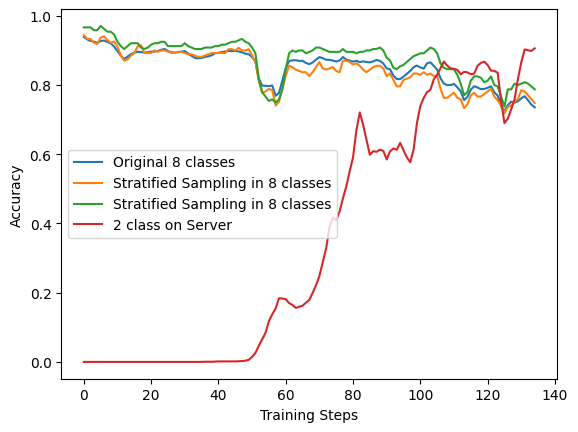

In [19]:
plt.plot(acc_n, label="Original 8 classes")
plt.plot(acc_n_stratified, label="Stratified Sampling in 8 classes")
plt.plot(acc_n_subsampling, label="Stratified Sampling in 8 classes")
plt.plot(acc_m, label="2 class on Server")
plt.xlabel("Training Steps")  
plt.ylabel("Accuracy")
plt.legend()
plt.show()

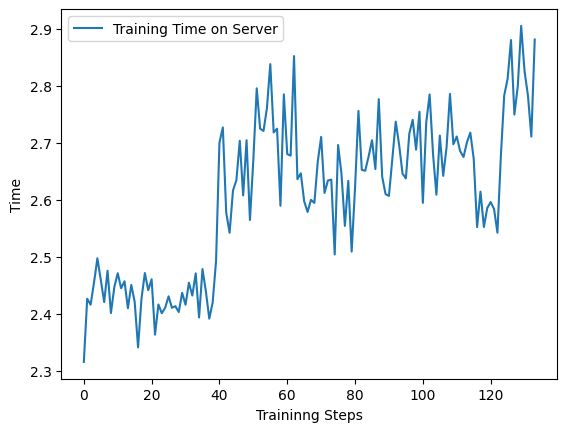

In [20]:
del Time[0]
plt.plot(Time ,label='Training Time on Server')
#plt.plot(device_time ,label='Training Time on Device')
plt.xlabel("Traininng Steps")  
plt.ylabel("Time")
plt.legend()
plt.savefig('Time_all.png')
plt.show()

In [21]:
mean = np.mean(Time)
median = np.median(Time)
maximum = np.max(Time)
minimum = np.min(Time)
percentile_90 = np.percentile(Time, 90)

# Print the results
print("Mean =", mean)
print("Median =", median)
print("Maximum =", maximum)
print("Minimum =", minimum)
print("90th Percentile =", percentile_90)

Mean = 2.605370046487495
Median = 2.633521795272827
Maximum = 2.904592990875244
Minimum = 2.3160154819488525
90th Percentile = 2.780732202529907
